# Film Performance Exploratory Data Analysis

Aidan O'Keefe

## Project Requirements (DELETE AFTER PROJECT)

Your analysis should yield three concrete business recommendations. The ultimate purpose of exploratory analysis is not just to learn about the data, but to help an organization perform better. Explicitly relate your findings to business needs by recommending actions that you think the business (Microsoft) should take.

Main question:
What types of films are currently doing the best at the box office?

Questions to answer:
What genre of movie makes the most money?
Which directors make the most money? 
Which generes/directors make the most profit? 

Factors to consider:
Do we just care about modern trends? Past 15 years? 
Which films are most profitable adjusted for inflation? 


Presentation and notebook should describe:
goals, data, methods, and result. 3 visualizations corresponding to 3 business recommendations.

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Case

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

What are the business's pain points related to this project?
How did you pick the data analysis question(s) that you did?
Why are these questions important from a business perspective?

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding

Describe the data being used for this project. 

We are going to look at data taken from IMDB and The Numbers.com

Questions to consider:

Where did the data come from, and how do they relate to the data analysis questions?
What do the data represent? Who is in the sample and what variables are included?
What is the target variable?
What are the properties of the variables you intend to use?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
# Here you run your code to explore the data

### IMPORTING SQL DATA FROM IMDB

In [3]:
import sqlite3
conn = sqlite3.connect('/Users/Aidan/Documents/Flatiron/Phase_1/dsc-phase-1-project-v2-4/zippedData/im.db')

In [4]:
q = """

SELECT movie_basics.primary_title AS "Film Name",
        movie_basics.original_title AS "Original Film Name",
        movie_basics.start_year AS "Release Year",
        movie_basics.runtime_minutes AS "Runtime (min)",
        movie_basics.genres AS "Genres",
        movie_ratings.averagerating AS "IMDB Average Rating",
        movie_ratings.numvotes AS "IMDB Votes Count"
        

FROM movie_basics
JOIN movie_ratings
    USING(movie_id)

"""
imdb_df = pd.read_sql(q, conn)

In [5]:
imdb_df.shape

(73856, 7)

In [6]:
imdb_df.head()

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### IMPORTING CSV/TSV DATA

In [7]:
mov_budgets_df = pd.read_csv\
("/Users/Aidan/Documents/Flatiron/Phase_1/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv")

In [8]:
mov_budgets_df.shape

(5782, 6)

In [9]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## DATA PREPARATION AND CLEANING

Describe and justify the process for preparing the data for analysis.

Questions to consider:

Were there variables you dropped or created?
How did you address missing values or outliers?
Why are these choices appropriate given the data and the business problem?


In [10]:
# Here you run your code to clean the data

Stripping the `production_budget` `domestic_gross` and `worldwide_gross` columns of the "$" and commas.
Also turning data type into integers to allow for calculations.

In [11]:
mov_budgets_df['production_budget'] = \
(mov_budgets_df['production_budget'].str.replace(',','').str.replace('$','')).astype(int)

In [12]:
mov_budgets_df['domestic_gross'] = \
(mov_budgets_df['domestic_gross'].str.replace(',','').str.replace('$','')).astype(int)

In [13]:
mov_budgets_df['worldwide_gross'] = \
mov_budgets_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)

Creating new columns `Domestic Profit` and `Worldwide Profit`

In [14]:
mov_budgets_df['Domestic Profit'] = mov_budgets_df['domestic_gross'] - mov_budgets_df['production_budget']

In [15]:
mov_budgets_df['Worldwide Profit'] = mov_budgets_df['worldwide_gross'] - mov_budgets_df['production_budget']

Creating new column `ROI  (percent)` (Return on Investment) for each film. 

`ROI  (percent)` equals 100 X (`Worldwide Profit` minus `production_budget` divided by `production_budget`)

In [16]:
mov_budgets_df["ROI (percent)"] = 100 * ((mov_budgets_df['Worldwide Profit'] - mov_budgets_df['production_budget'])\
                        / mov_budgets_df['production_budget'])

In [17]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,453.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,54.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-157.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,224.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,215.369636


Create a `release_year` column from `release_date` in `mov_budgets_df`

In [18]:
mov_budgets_df['release_year'] = [i[-4:] for i in mov_budgets_df["release_date"]]

In [19]:
mov_budgets_df["release_year"].dtype

dtype('O')

In [20]:
mov_budgets_df["release_year"] = mov_budgets_df["release_year"].astype(int)

In [21]:
mov_budgets_df["release_year"].dtype

dtype('int64')

In [22]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,453.257713,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,54.667286,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-157.210757,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,224.384139,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,215.369636,2017


### Consolidating Data Frames

#### IMDB Data Base and The Numbers CSV Merge

Merging based on the following columns in each data frame:
- imdb_df('Original Film Name')
- mov_budgets_df ('movie')

In [23]:
imdb_bud_df = imdb_df.merge(mov_budgets_df, how="inner", left_on= "Original Film Name", right_on= "movie")

In [24]:
imdb_bud_df.shape

(2638, 17)

In [25]:
imdb_bud_df= imdb_bud_df[imdb_bud_df["Release Year"] == imdb_bud_df["release_year"]]

In [26]:
imdb_bud_df.head(10)

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),release_year
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,-199.836209,2012
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996,909808,965996,382.998000,2015
6,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,-32763162,96861183,6.440860,2013
7,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,-1982315,34108587,21.816382,2014
8,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864,566.909239,2015
9,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,16,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,-31890185,-23455268,-152.122818,2011
10,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570,4,"Apr 13, 2012",The Three Stooges,30000000,44338224,54052249,14338224,24052249,-19.825837,2012
11,Anderson's Cross,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",5.5,106,65,"Dec 31, 2010",Anderson's Cross,300000,0,0,-300000,-300000,-200.000000,2010
12,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,15,"Nov 24, 2010",Tangled,260000000,200821936,586477240,-59178064,326477240,25.568169,2010
13,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,14,"Mar 9, 2012",John Carter,275000000,73058679,282778100,-201941321,7778100,-97.171600,2012


In [27]:
imdb_bud_df.shape

(1489, 17)

Removing unwanted columns

In [28]:
imdb_bud_df = imdb_bud_df.drop(axis=1, columns = \
            ['id','movie','Original Film Name', 'release_year'])

In [29]:
imdb_bud_df.shape

(1489, 13)

### Remove Duplicates

Here we run into the issue of some movies having the same name. These duplicates could include remakes done years later or domestic remake of a foreign film. However we know the release year of these films will differ. We tried to avoid the foreign film issue by merging data sets based on `Original Film Name` rather than `Film Name`.

In [30]:
imdb_bud_df.duplicated(subset=["Film Name", "Release Year"]).value_counts()

False    1464
True       25
dtype: int64

In [31]:
imdb_bud_df[imdb_bud_df.duplicated(subset=["Film Name", "Release Year"]) == True]

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
149,Robin Hood,2018,NaN,None,7.6,5,"Nov 21, 2018",99000000,30824628,84747441,-68175372,-14252559,-114.396524
182,Alice in Wonderland,2010,99.0,"Fantasy,Musical",6.5,6,"Mar 5, 2010",200000000,334191110,1025491110,134191110,825491110,312.745555
209,The Bounty Hunter,2010,NaN,None,6.3,29,"Mar 19, 2010",45000000,67061228,135808837,22061228,90808837,101.797416
263,Big Eyes,2014,NaN,Documentary,7.2,43,"Dec 25, 2014",10000000,14482031,27317872,4482031,17317872,73.178720
265,Burlesque,2010,NaN,Drama,7.0,45,"Nov 24, 2010",55000000,39440655,90552675,-15559345,35552675,-35.358773
280,After,2012,83.0,Romance,6.3,34,"Dec 31, 2012",650000,0,0,-650000,-650000,-200.000000
411,Hercules,2014,112.0,Comedy,6.2,72,"Jul 25, 2014",100000000,72688614,243388614,-27311386,143388614,43.388614
425,The Tempest,2010,131.0,Drama,7.8,94,"Dec 10, 2010",20000000,277943,277943,-19722057,-19722057,-198.610285
488,Cyrus,2010,91.0,"Comedy,Drama,Romance",6.3,32457,"Jun 18, 2010",7000000,7468936,10062896,468936,3062896,-56.244343
708,The Forest,2016,109.0,"Drama,Fantasy,Horror",6.5,222,"Jan 8, 2016",10000000,26594261,40749230,16594261,30749230,207.492300


In [32]:
#EXAMPLE OF A DUPLICATE

imdb_bud_df[(imdb_bud_df['Film Name'] == "Robin Hood") & (imdb_bud_df["Release Year"] == 2018)]

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
147,Robin Hood,2018,116.0,"Action,Adventure,Thriller",5.3,41588,"Nov 21, 2018",99000000,30824628,84747441,-68175372,-14252559,-114.396524
149,Robin Hood,2018,NaN,None,7.6,5,"Nov 21, 2018",99000000,30824628,84747441,-68175372,-14252559,-114.396524


In [33]:
budgets_df = imdb_bud_df.drop_duplicates(subset= ["Film Name", "Release Year"], keep='first', inplace=False)

In [34]:
budgets_df.shape

(1464, 13)

In [35]:
budgets_df.set_index('Film Name', inplace=True)

In [36]:
budgets_df.reset_index(inplace=True)

In [37]:
#EXAMPLE THAT DUPLICATES BY FILM NAME AND YEAR ARE GONE

budgets_df[budgets_df['Film Name'] == "Robin Hood"]

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
112,Robin Hood,2010,140.0,"Action,Adventure,Drama",6.6,239480,"May 14, 2010",210000000,105487148,322459006,-104512852,112459006,-46.448092
113,Robin Hood,2018,116.0,"Action,Adventure,Thriller",5.3,41588,"Nov 21, 2018",99000000,30824628,84747441,-68175372,-14252559,-114.396524


In [38]:
budgets_df.head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",45000000,0,73706,-45000000,-44926294,-199.836209
1,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,"Jun 19, 2015",200000,1109808,1165996,909808,965996,382.998000
2,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,-32763162,96861183,6.440860
3,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,-1982315,34108587,21.816382
4,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"Jun 12, 2015",215000000,652270625,1648854864,437270625,1433854864,566.909239


### Dealing with Missing Values

Now let's take a look at the missing values of our newly compiled data frame.

In [39]:
budgets_df.isna().sum()

Film Name              0
Release Year           0
Runtime (min)          4
Genres                 0
IMDB Average Rating    0
IMDB Votes Count       0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
Domestic Profit        0
Worldwide Profit       0
ROI (percent)          0
dtype: int64

We can see we are missing 4 values in `Runtime (min)`. We may be able to impute the missing `Runtime (min)` by looking up the films, however it may be worth simply dropping the records as there are so few of them.

In [40]:
budgets_df[budgets_df['Runtime (min)'].isna()==True]

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
670,Should've Been Romeo,2012,NaN,"Comedy,Drama",6.5,44,"Dec 31, 2012",5000000,0,0,-5000000,-5000000,-200.000000
811,Destiny,2014,NaN,"Adventure,Comedy,Family",8.4,25,"Dec 31, 2014",750000,0,450,-750000,-749550,-199.940000
1293,The Promise,2017,NaN,Comedy,8.8,53,"Apr 21, 2017",90000000,8224288,10551417,-81775712,-79448583,-188.276203
1327,Romantic Schemer,2015,NaN,Romance,5.3,178,"Dec 31, 2015",125000,0,0,-125000,-125000,-200.000000


In [41]:
budgets_df[budgets_df['Film Name'] == "Robin Hood"]

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
112,Robin Hood,2010,140.0,"Action,Adventure,Drama",6.6,239480,"May 14, 2010",210000000,105487148,322459006,-104512852,112459006,-46.448092
113,Robin Hood,2018,116.0,"Action,Adventure,Thriller",5.3,41588,"Nov 21, 2018",99000000,30824628,84747441,-68175372,-14252559,-114.396524


### Spitting the Genres column

In [42]:
budgets_df.Genres.value_counts()

Adventure,Animation,Comedy    68
Comedy                        53
Drama                         52
Comedy,Drama,Romance          50
Action,Adventure,Sci-Fi       49
                              ..
Action,Fantasy,Thriller        1
Action,Comedy,Sport            1
Biography,Drama,Musical        1
Documentary,Drama              1
Comedy,Horror,Mystery          1
Name: Genres, Length: 228, dtype: int64

In [43]:
budgets_df.Genres= budgets_df.Genres.apply(lambda x: str(x).split(","))

/Users/Aidan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
budgets_df.head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
0,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,-45000000,-44926294,-199.836209
1,The Overnight,2015,79.0,"[Comedy, Mystery]",6.1,14828,"Jun 19, 2015",200000,1109808,1165996,909808,965996,382.998000
2,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,-32763162,96861183,6.440860
3,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,-1982315,34108587,21.816382
4,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,"Jun 12, 2015",215000000,652270625,1648854864,437270625,1433854864,566.909239


In [45]:
#SPLIT GENRE COLUMN INTO COLUMNS

split_genres_df = pd.DataFrame(budgets_df['Genres'].to_list(), columns=['Genre 1','Genre 2', "Genre 3"])

In [46]:
split_genres_df

,Genre 1,Genre 2,Genre 3
0,Action,Animation,Comedy
1,Comedy,Mystery,None
2,Adventure,Comedy,Drama
3,Action,Crime,Drama
4,Action,Adventure,Sci-Fi
...,...,...,...
1459,Action,Comedy,Crime
1460,Drama,Horror,Mystery
1461,Biography,Comedy,Drama
1462,Documentary,None,None


Merge the new `split_genres_df` into the main dataframe `budgets_df`

In [47]:
genres_df = budgets_df.merge(split_genres_df, left_index=True, right_index=True)

In [48]:
genres_df.head()

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Genre 1,Genre 2,Genre 3
0,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,-45000000,-44926294,-199.836209,Action,Animation,Comedy
1,The Overnight,2015,79.0,"[Comedy, Mystery]",6.1,14828,"Jun 19, 2015",200000,1109808,1165996,909808,965996,382.998000,Comedy,Mystery,None
2,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,-32763162,96861183,6.440860,Adventure,Comedy,Drama
3,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,-1982315,34108587,21.816382,Action,Crime,Drama
4,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,"Jun 12, 2015",215000000,652270625,1648854864,437270625,1433854864,566.909239,Action,Adventure,Sci-Fi


## Data Modeling


Describe and justify the process for analyzing or modeling the data.

Questions to consider:

How did you analyze or model the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?


In [49]:
# Here you run your code to model the data

In [50]:
# Do a Pair Plot to explore relationships across the dataframe
# sns.pairplot(genres_df, corner=True)

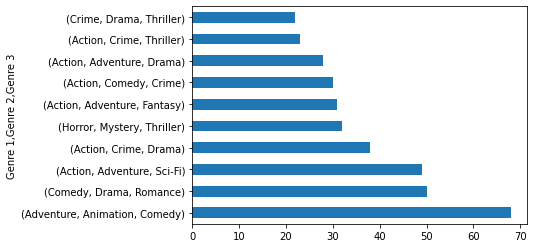

In [51]:
top_10_genre_combos = genres_df[["Genre 1", "Genre 2", "Genre 3"]].value_counts().head(10)

top_10_genre_combos.plot(kind = 'barh');

In [52]:
list(top_10_genre_combos.keys())

[('Adventure', 'Animation', 'Comedy'),
 ('Comedy', 'Drama', 'Romance'),
 ('Action', 'Adventure', 'Sci-Fi'),
 ('Action', 'Crime', 'Drama'),
 ('Horror', 'Mystery', 'Thriller'),
 ('Action', 'Adventure', 'Fantasy'),
 ('Action', 'Comedy', 'Crime'),
 ('Action', 'Adventure', 'Drama'),
 ('Action', 'Crime', 'Thriller'),
 ('Crime', 'Drama', 'Thriller')]

In [53]:
genre_combo_df = top_10_genre_combos.to_frame().reset_index()

In [54]:
genre_combo_df['Genres'] = genre_combo_df["Genre 1"] + " " + genre_combo_df["Genre 2"] + " " +\
                            genre_combo_df["Genre 3"]
genre_combo_df

,Genre 1,Genre 2,Genre 3,0,Genres
0,Adventure,Animation,Comedy,68,Adventure Animation Comedy
1,Comedy,Drama,Romance,50,Comedy Drama Romance
2,Action,Adventure,Sci-Fi,49,Action Adventure Sci-Fi
3,Action,Crime,Drama,38,Action Crime Drama
4,Horror,Mystery,Thriller,32,Horror Mystery Thriller
5,Action,Adventure,Fantasy,31,Action Adventure Fantasy
6,Action,Comedy,Crime,30,Action Comedy Crime
7,Action,Adventure,Drama,28,Action Adventure Drama
8,Action,Crime,Thriller,23,Action Crime Thriller
9,Crime,Drama,Thriller,22,Crime Drama Thriller


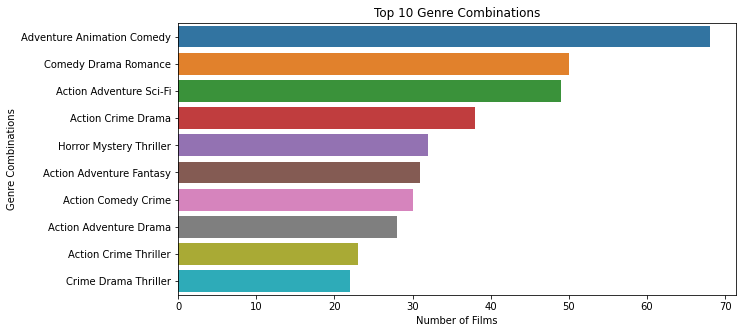

In [55]:
#Histogram to see number of films of each Genre Combination

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x = list(top_10_genre_combos.values), y = genre_combo_df['Genres'])

ax.set_title('Top 10 Genre Combinations')

ax.set_xlabel('Number of Films')
ax.set_ylabel('Genre Combinations');


Can I now see which films have the greatest ROI (cost the least and profits the most)?

In [69]:
budgets_df.sort_values(by = 'ROI (percent)', ascending=False).head(20)

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
973,The Gallows,2015,81.0,"[Horror, Mystery, Thriller]",4.2,17763,"Jul 10, 2015",100000,22764410,41656474,22664410,41556474,41456.474000
16,The Devil Inside,2012,83.0,[Horror],4.2,33522,"Jan 6, 2012",1000000,53262945,101759490,52262945,100759490,9975.949000
491,Paranormal Activity 2,2010,91.0,[Horror],5.7,93122,"Oct 20, 2010",3000000,84752907,177512032,81752907,174512032,5717.067733
1371,Get Out,2017,104.0,"[Horror, Mystery, Thriller]",7.7,400474,"Feb 24, 2017",5000000,176040665,255367951,171040665,250367951,4907.359020
1364,Moonlight,2016,111.0,[Drama],7.4,227964,"Oct 21, 2016",1500000,27854931,65245512,26354931,63745512,4149.700800
830,Chernobyl Diaries,2012,86.0,"[Horror, Mystery, Thriller]",5.0,60304,"May 25, 2012",1000000,18119640,42411721,17119640,41411721,4041.172100
707,Paranormal Activity 3,2011,83.0,"[Horror, Mystery, Thriller]",5.8,85689,"Oct 21, 2011",5000000,104028807,207039844,99028807,202039844,3940.796880
1173,Annabelle,2014,99.0,"[Horror, Mystery, Thriller]",5.4,122039,"Oct 3, 2014",6500000,84273813,256862920,77773813,250362920,3751.737231
318,The Last Exorcism,2010,87.0,"[Drama, Horror, Thriller]",5.6,45815,"Aug 27, 2010",1800000,41034350,70165900,39234350,68365900,3698.105556
1373,Dangal,2016,161.0,"[Action, Biography, Drama]",8.5,123638,"Dec 21, 2016",9500000,12391761,294654618,2891761,285154618,2901.627558


It appears that Horror/Thriller seems to be the greatest investment in terms of cost versus profit.

Can I now see which of the 10 Ten Movie Combos has the greatest ROI (cost the least and profits the most)?

Let's see which films have the highest IMDB Average Rating?

In [72]:
genres_df.sort_values(by = 'IMDB Average Rating', ascending=False).head(20)

,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Genre 1,Genre 2,Genre 3
358,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,132576195,675524642,322.202901,Action,Adventure,Sci-Fi
1293,The Promise,2017,NaN,[Comedy],8.8,53,"Apr 21, 2017",90000000,8224288,10551417,-81775712,-79448583,-188.276203,Comedy,None,None
74,Interstellar,2014,169.0,"[Adventure, Drama, Sci-Fi]",8.6,1299334,"Nov 5, 2014",165000000,188017894,666379375,23017894,501379375,203.866288,Adventure,Drama,Sci-Fi
1289,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926,"Apr 27, 2018",300000000,678815482,2048134200,378815482,1748134200,482.711400,Action,Adventure,Sci-Fi
1064,Whiplash,2014,106.0,"[Drama, Music]",8.5,616916,"Oct 10, 2014",3300000,13092006,38969037,9792006,35669037,980.879909,Drama,Music,None
1373,Dangal,2016,161.0,"[Action, Biography, Drama]",8.5,123638,"Dec 21, 2016",9500000,12391761,294654618,2891761,285154618,2901.627558,Action,Biography,Drama
811,Destiny,2014,NaN,"[Adventure, Comedy, Family]",8.4,25,"Dec 31, 2014",750000,0,450,-750000,-749550,-199.940000,Adventure,Comedy,Family
343,The Dark Knight Rises,2012,164.0,"[Action, Thriller]",8.4,1387769,"Jul 20, 2012",275000000,448139099,1084439099,173139099,809439099,194.341491,Action,Thriller,None
344,Redemption,2013,106.0,"[Drama, Mystery, Thriller]",8.4,5,"Jun 28, 2013",23000000,36686,13593473,-22963314,-9406527,-140.897943,Drama,Mystery,Thriller
1007,Coco,2017,105.0,"[Adventure, Animation, Comedy]",8.4,277194,"Nov 22, 2017",175000000,209726015,798008101,34726015,623008101,256.004629,Adventure,Animation,Comedy


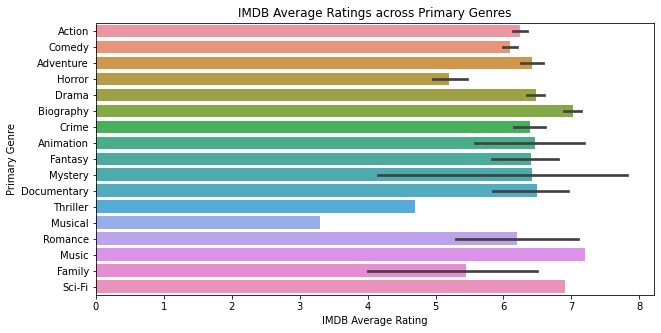

In [75]:
#Scatter plot to see relationship between Primary Genre t and Worldwide Profit
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x = 'IMDB Average Rating', y = 'Genre 1', data = genres_df )

ax.set_title('IMDB Average Ratings across Primary Genres')

ax.set_xlabel('IMDB Average Rating')
ax.set_ylabel('Primary Genre');

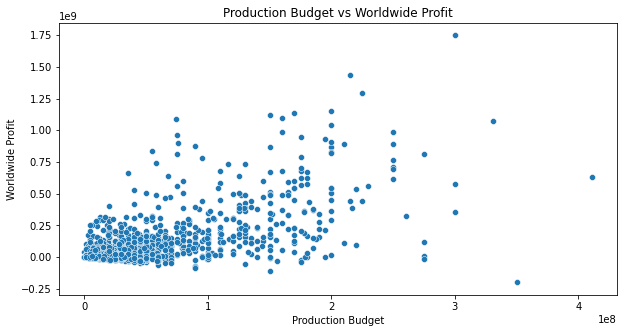

In [57]:
#Scatter plot to see relationship between Production Budget and Worldwide Profit
fig, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(x = 'production_budget', y = 'Worldwide Profit', data = genres_df )

ax.set_title('Production Budget vs Worldwide Profit')

ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Profit');

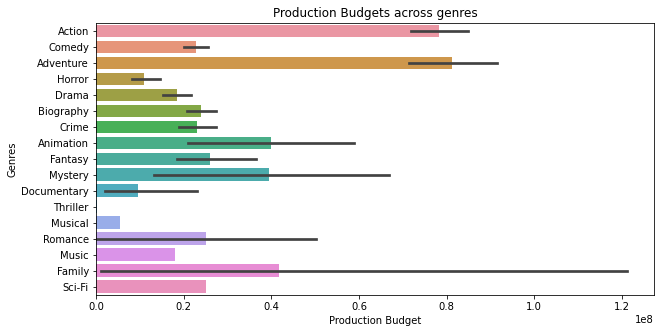

In [58]:
#Bar graph to see production budget of different Genres
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x = 'production_budget', y = 'Genre 1', data = genres_df )

ax.set_title('Production Budgets across genres')

ax.set_xlabel('Production Budget')
ax.set_ylabel('Genres');

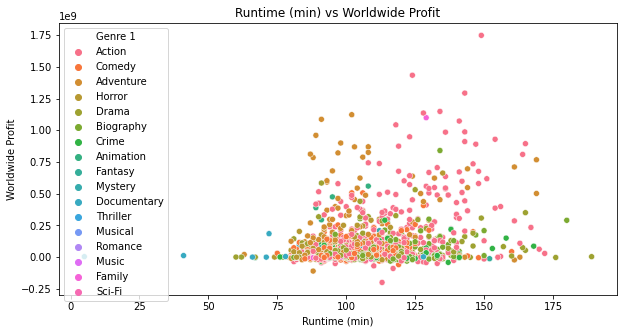

In [59]:
 #Scatter plot to see relationship between Runtime (min) and Worldwide Profit
fig, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(x = 'Runtime (min)', y = 'Worldwide Profit', hue = "Genre 1", data = genres_df )

ax.set_title('Runtime (min) vs Worldwide Profit')

ax.set_xlabel('Runtime (min)')
ax.set_ylabel('Worldwide Profit');

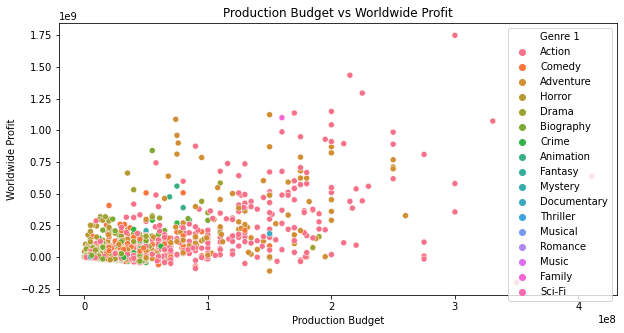

In [60]:
 #Scatter plot to see relationship between Production Budget and Worldwide Profit
fig, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(x = 'production_budget', y = 'Worldwide Profit', hue = "Genre 1", data = genres_df )

ax.set_title('Production Budget vs Worldwide Profit')

ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Profit');

In [61]:
#Bar plot to see how Worldwide Profits for priamry movie genres

# fig, ax = plt.subplots(figsize = (10,5))

# x= genres_df["Genre 1"]

# y= genres_df["Worldwide Profit"]


# ax.barh(x, y);
# ax.vlines(x = 0, ymin = "Action", ymax="Sci-Fi", colors='black', linestyles='dashed');


In [62]:
#Bar plot to see how production budgets have changed year to year on average

# fig, ax = plt.subplots(figsize = (10,5))

# x= budgets_df["Release Year"]

# y= budgets_df["production_budget"]


# ax.bar(x, y);

## Evaluation


Evaluate how well your work solves the stated business problem.

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model?
- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?


## Conclusions


Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project?